<a href="https://colab.research.google.com/github/1Nine2/Parcial1IA/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from wordcloud import WordCloud

In [3]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# a. El calculo del 1er cuartil de datos, el percentil 50 por columna; explique qué significa en cada caso mediante Python sin uso de librerías

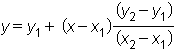

In [35]:
def calc_quantile(lst, q, method='linear'):
    if not lst:
        return ValueError("Lista vacia no se puede calcular quartil")
    if not 0 <= q <= 1:
        return ValueError("q debe estar entre 0 y 1")
    if method not in ['linear', 'left-side', 'average']:df.drop('id',axis=1,inplace=True)
        return NotImplementedError("Este metodo no ha sido implementado")

    s_lst = sorted(lst)

    idx = (len(s_lst) - 1)*q
    int_idx = int(idx)
    remainder = idx % 1
    if remainder > 0 and method != 'left-side':
        lower_val = s_lst[int_idx]
        upper_val = s_lst[int_idx + 1]

        if method == 'linear':
            return lower_val * (1 - remainder) + upper_val * remainder
        else:
            return (lower_val + upper_val) / 2
    else:
        return s_lst[int_idx]

2


In [49]:
print('1er Quartil') 
print(calc_quantile(dataset.age.tolist(), 0.25, 'linear'))   
print('Percentil 50') 
print(calc_quantile(dataset.age.tolist(), 0.50, 'linear'))   

1er Quartil
25.0
Percentil 50
45.0


#  b. Realice lo mismo del inciso (a) con el uso de numpy y pandas

In [39]:
dataset.age.quantile([0.25,0.50], interpolation='linear')

0.25    25.0
0.50    45.0
Name: age, dtype: float64

# c. Grafique los datos y explique su comportamiento (PYTHON)

In [40]:
dataset.drop('id',axis=1,inplace=True)

In [43]:
df = dataset

*Esta es una decripcion general del dataset*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f719b7530d0>,
      dtype=object)

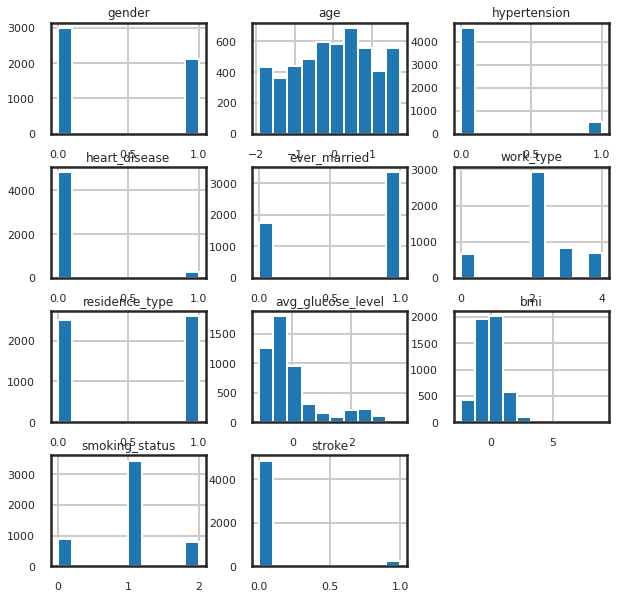

In [88]:
df.hist(figsize=(10,10))

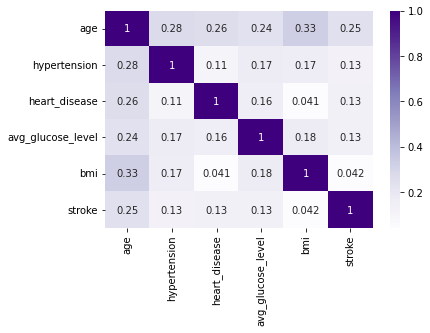

In [52]:
sns.heatmap(df.corr(), cmap = 'Purples',annot=True);

*se muestran las distribuciones de edad y bmi*

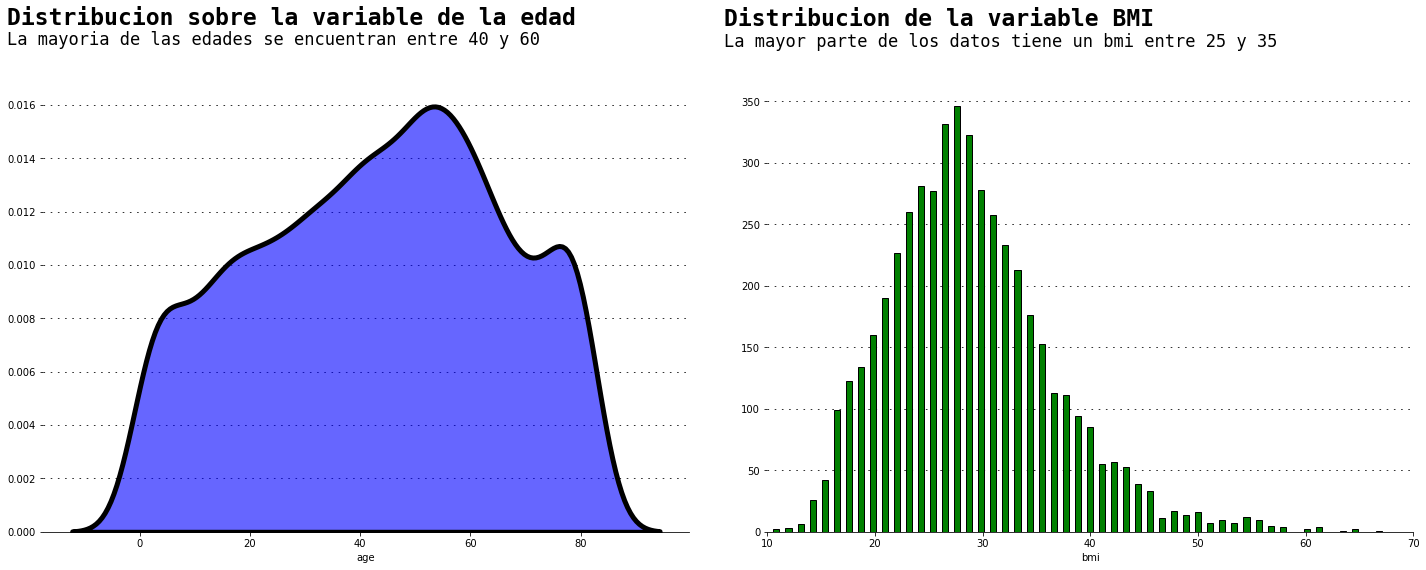

In [54]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,2)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-24,0.019,'Distribucion sobre la variable de la edad',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(-24,0.01826,'La mayoria de las edades se encuentran entre 40 y 60',fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(6,412,'Distribucion de la variable BMI',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[1].text(6,395,'La mayor parte de los datos tiene un bmi entre 25 y 35',fontsize=17,fontweight='light', fontfamily='monospace')

sns.kdeplot(x=df['age'],ax=ax[0],shade=True, color='blue', alpha=0.6,zorder=3,linewidth=5,edgecolor='black')
sns.histplot(x=df['bmi'],ax=ax[1], color='green', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
ax[1].set_xlim(10,70)
        
plt.tight_layout()

*Se decriben las ditribuciones en genero y tipos de trabajo*

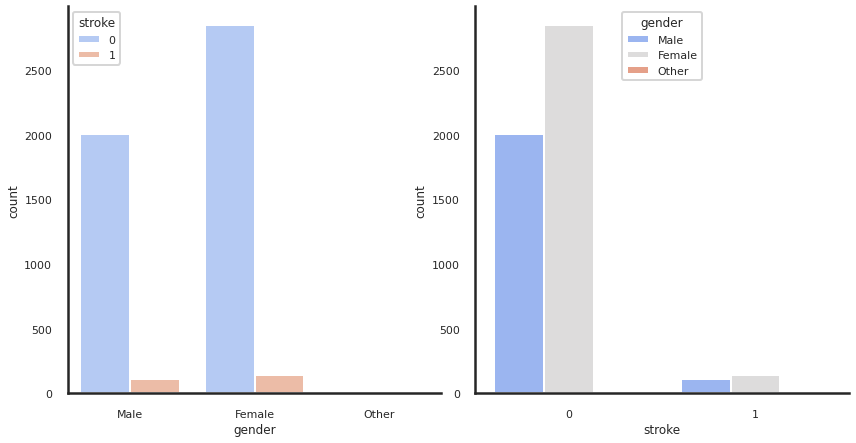

In [57]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='gender', hue='stroke', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='gender', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()



plt.show()

*Se describen las variables de enfermedades del corazon, hipertension y niveles de glucosa de acuerdo a si se experimento o no un accidente cerebrovascular*

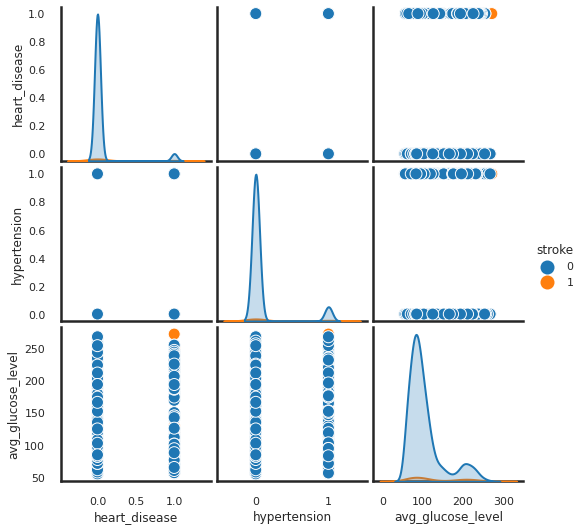

In [65]:
sns.pairplot(df, hue = 'stroke', vars = ['heart_disease', 'hypertension','avg_glucose_level'])

#3. Del dataset anterior realice en PYTHON, tres algoritmos de preprocesamiento.

In [67]:
df.columns=df.columns.str.lower()

In [68]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [69]:
df=df.fillna(np.mean(df['bmi']))#Para no tener valores perdidos
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [71]:
df['smoking_status'].replace('Unknown', df['smoking_status'].mode()[0], inplace=True)#Reemplazamos datos desconocidos 

In [72]:
df = df[df['gender'] != 'Other']#Ignoraremos a los datos que no sean binarios 

In [73]:
numeric_data=df.loc[:,df.nunique() > 5]
cols = [col for col in df.columns if col not in numeric_data]

categorical_data=df[cols].drop('stroke',axis=1)
numeric_data=pd.DataFrame(numeric_data)
categorical_data=pd.DataFrame(categorical_data)#Diferenciamos dos tipos de datos aquellos que se definen numericamente y otros que se describen literariamente 

In [74]:
print(f'Numerical data: {list(numeric_data)}')
print(f'Categorical data: {list(categorical_data)}')

Numerical data: ['age', 'avg_glucose_level', 'bmi']
Categorical data: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


In [76]:
from sklearn.preprocessing import LabelEncoder#Importamos algunas librerias para el preprocesamiento de datos
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

**Standart Scaler**

In [77]:
num_cols=numeric_data.columns.to_list()
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])#Estandarizamos la escala estadarizada un metodo de preprocesamiento 

In [78]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051242,0,1,Yes,Private,Urban,2.706450,1.001041,formerly smoked,1
1,Female,0.785889,0,0,Yes,Self-employed,Rural,2.121652,-0.000165,never smoked,1
2,Male,1.626174,0,1,Yes,Private,Rural,-0.004867,0.468399,never smoked,1
3,Female,0.255182,0,0,Yes,Private,Urban,1.437473,0.715233,smokes,1
4,Female,1.581949,1,0,Yes,Self-employed,Rural,1.501297,-0.635858,never smoked,1


**LabelEncoding**

In [79]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [80]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,2,1,2.706450,1.001041,0,1
1,0,0.785889,0,0,1,3,0,2.121652,-0.000165,1,1
2,1,1.626174,0,1,1,2,0,-0.004867,0.468399,1,1
3,0,0.255182,0,0,1,2,1,1.437473,0.715233,2,1
4,0,1.581949,1,0,1,3,0,1.501297,-0.635858,1,1


**SMOTE - Synthetic Minority Oversampling Technique**

In [81]:
training_data=df.copy()
x= training_data.drop(['stroke'],axis=1)
y= df['stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train,y_train)

**MODELOS**

---



*KNN*

In [83]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.7788649706457925

*Arbol de decision*

In [84]:
decision_tree = DecisionTreeClassifier()   
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.8424657534246576

**5. En PYTHON grafique el arbol de decision del dataset seleccionado.**

In [86]:
from sklearn import tree

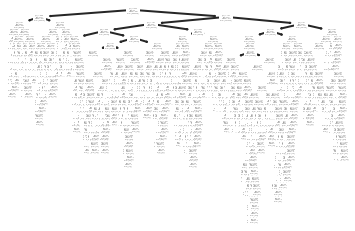

In [91]:
tree.plot_tree(decision_tree);

# 4. Con el uso de librerías en PYTHON, construya la dependencia de Abuelos, tios, padres, primos e hijos de su familia.

In [112]:
from IPython.display import SVG
import os

In [108]:
ancestry = pd.read_excel('/content/Parientes.xlsx')
ancestry.to_csv('/content/genealogia.csv', index = None, header=True)
ancestry = pd.read_csv('/content/genealogia.csv')

In [109]:
ancestry.columns

Index(['Person 1', 'Relation', 'Person 2', 'Gender', 'Details'], dtype='object')

In [121]:
ancestry.head()

,Person 1,Relation,Person 2,Gender,Details,recorded_ind
0,Richard,Earliest Ancestor,NaN,M,Abuelo,NaN
1,Ines,Spouse,Richard,F,Abuela,NaN
2,Richard J.,Child,Richard,M,Tio,NaN
3,Elizabeth,Child,Richard,F,Tia,NaN
4,Liliana,Child,Richard,F,Tia,NaN


In [134]:
from graphviz import Digraph
import pandas as pd

ancestry = pd.read_csv('genealogia.csv')
earl_ans = ancestry.loc[ancestry['Relation'] == 'Earliest Ancestor', 'Person 1'].iloc[0]
ancestry['recorded_ind'] = 0   

incomp = [earl_ans]
comp = []

dot = Digraph(comment = 'Ancestry', graph_attr = {'splines':'ortho'})
node_nm = []

# 1er Nodo
det = str(ancestry.loc[ancestry['Person 1'] == earl_ans, 'Details'][0])
g = ancestry.loc[ancestry['Person 1'] == earl_ans, 'Gender'][0]
sh = 'rect' if g == 'M' else 'ellipse'
dot.node(earl_ans, earl_ans, tooltip = det, shape = sh)
node_nm.append(earl_ans)

ancestry.loc[ancestry['Person 1'] == earl_ans, 'recorded_ind'] = 1

#Numero maximo de iteraciones
max_iter = 15

for i in range(0, max_iter):
    print(i)
    temp = ancestry[ancestry['recorded_ind'] == 0]

    if len(temp) == 0:      # Romper el for
        break
    else:
        temp['this_gen_ind'] = temp.apply(lambda x: 1 if x['Person 2'] in incomp else 0, axis = 1)

        # Relaciones Esposa
        this_gen = temp[(temp['this_gen_ind'] == 1) & (ancestry.Relation == 'Spouse')]
        if len(this_gen) > 0:
            for j in range(0, len(this_gen)):
                per1 = this_gen['Person 1'].iloc[j]
                per2 = this_gen['Person 2'].iloc[j]
                det = str(this_gen['Details'].iloc[j])
                g = this_gen['Gender'].iloc[j]
                sh = 'rect' if g == 'M' else 'ellipse'
                with dot.subgraph() as subs:
                    subs.attr(rank = 'same')
                    subs.node(per1, per1, tooltip = det, shape = sh, fillcolor = "red")
                    node_nm.append(per1)
                    subs.edge(per2, per1, arrowhead = 'none', color = "black:invis:black")

        # Relaciones Hijo
        this_gen = temp[(temp['this_gen_ind'] == 1) & (temp['Relation'] == 'Child')]
        if len(this_gen) > 0:
            for j in range(0, len(this_gen)):
                per1 = this_gen['Person 1'].iloc[j]
                per2 = this_gen['Person 2'].iloc[j]
                det = str(this_gen['Details'].iloc[j])
                g = this_gen['Gender'].iloc[j]
                sh = 'rect' if g == 'M' else 'ellipse'
                dot.node(per1, per1, tooltip = det, shape = sh)
                node_nm.append(per1)
                dot.edge(per2, per1)

        comp.extend(incomp)
        incomp = list(temp.loc[temp['this_gen_ind'] == 1, 'Person 1'])
        ancestry['recorded_ind'] = temp.apply(lambda x: 1 if (x['Person 1'] in incomp) | (x['Person 1'] in comp) else 0, axis = 1)


dot.format = 'png'
dot.render('sample_ancestry', view = True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


'sample_ancestry.png'

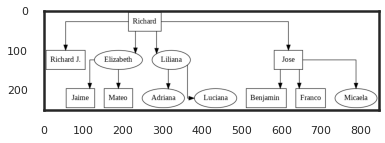

In [135]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('sample_ancestry.png')
plt.imshow(img)
plt.show()